In [104]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import re
sns.set()
%matplotlib notebook
import warnings
warnings.filterwarnings('ignore')

In [106]:
KAGGLE_DIR = 'data/'
#KAGGLE_DIR = '../input/'

import os
print(os.listdir(KAGGLE_DIR))

['test_images', 'breed_labels.csv', '.DS_Store', 'test', 'train_metadata', 'color_labels.csv', 'test_sentiment', 'test_metadata', 'train_sentiment', 'train', 'train_images', 'state_labels.csv']


In [107]:

train=pd.read_csv(KAGGLE_DIR+'train/train.csv')
test=pd.read_csv(KAGGLE_DIR+'test/test.csv')
breed_labels=pd.read_csv(KAGGLE_DIR+'breed_labels.csv')
breed_labels['tipo_animal']= np.where(breed_labels['Type']==1,'Dog','Cat')  #Difference between animals
color_labels=pd.read_csv(KAGGLE_DIR+'color_labels.csv')
color_labels.set_index('ColorID',inplace=True)
state_labels=pd.read_csv(KAGGLE_DIR+'state_labels.csv')
full=train.append(test)

In [108]:
print(train.shape)
print(test.shape)
print(full.shape)

(14993, 24)
(3948, 23)
(18941, 24)


We can appreciate that the split between trainning and test is 26%

### Cats vs Dogs

In [109]:
sum(full.Type==3)

0

<IPython.core.display.Javascript object>


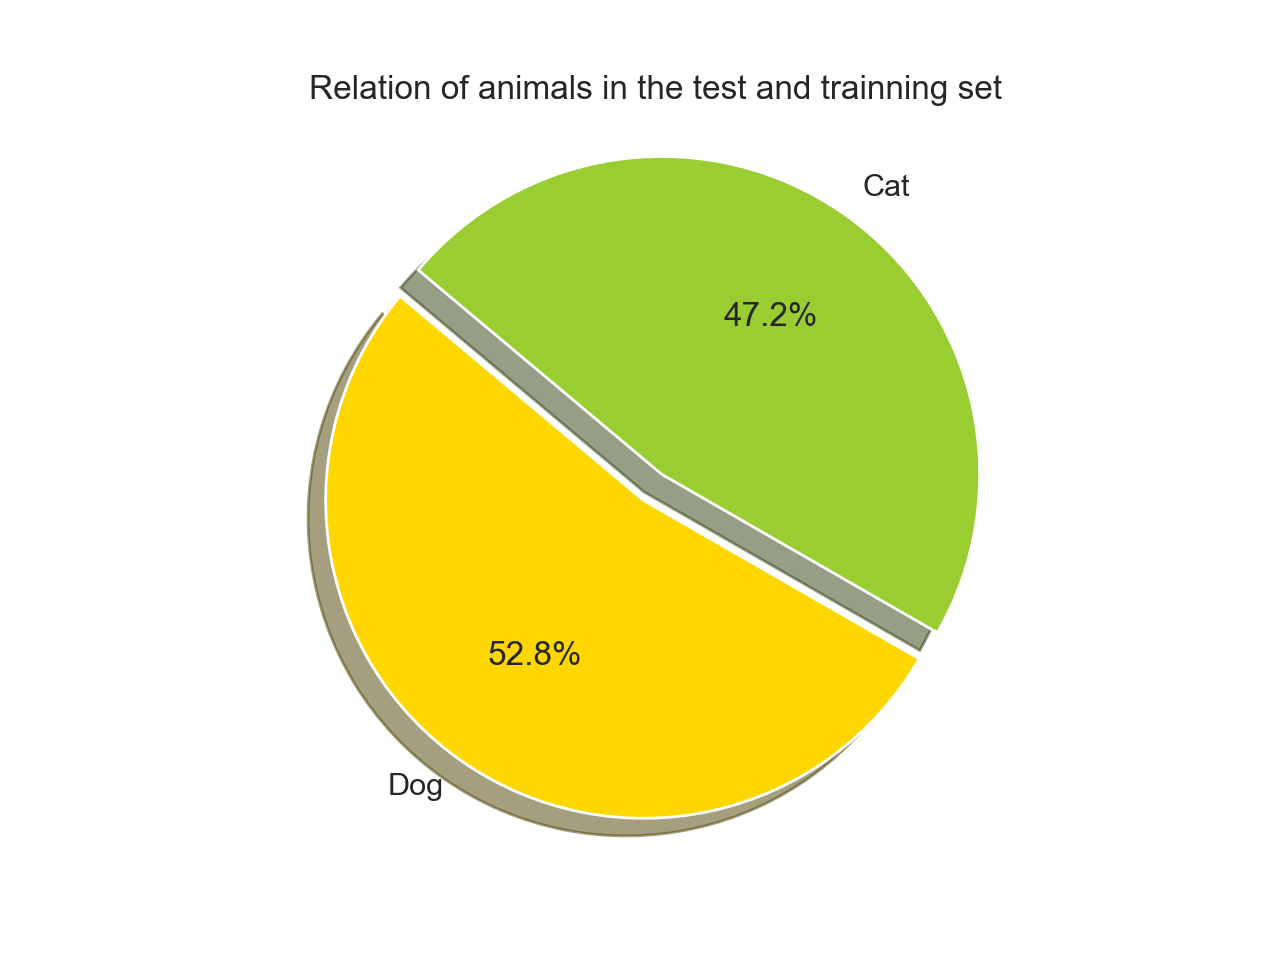

In [110]:
full['animal'] = np.where(full['Type']==1, 'dog', 'cat')
sizes=[sum(full.animal=='dog'),sum(full.animal=='cat')]
labels=['Dog','Cat']
colors = ['gold', 'yellowgreen']
explode = (0.1, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.title('Relation of animals in the test and trainning set')
plt.show()


<IPython.core.display.Javascript object>


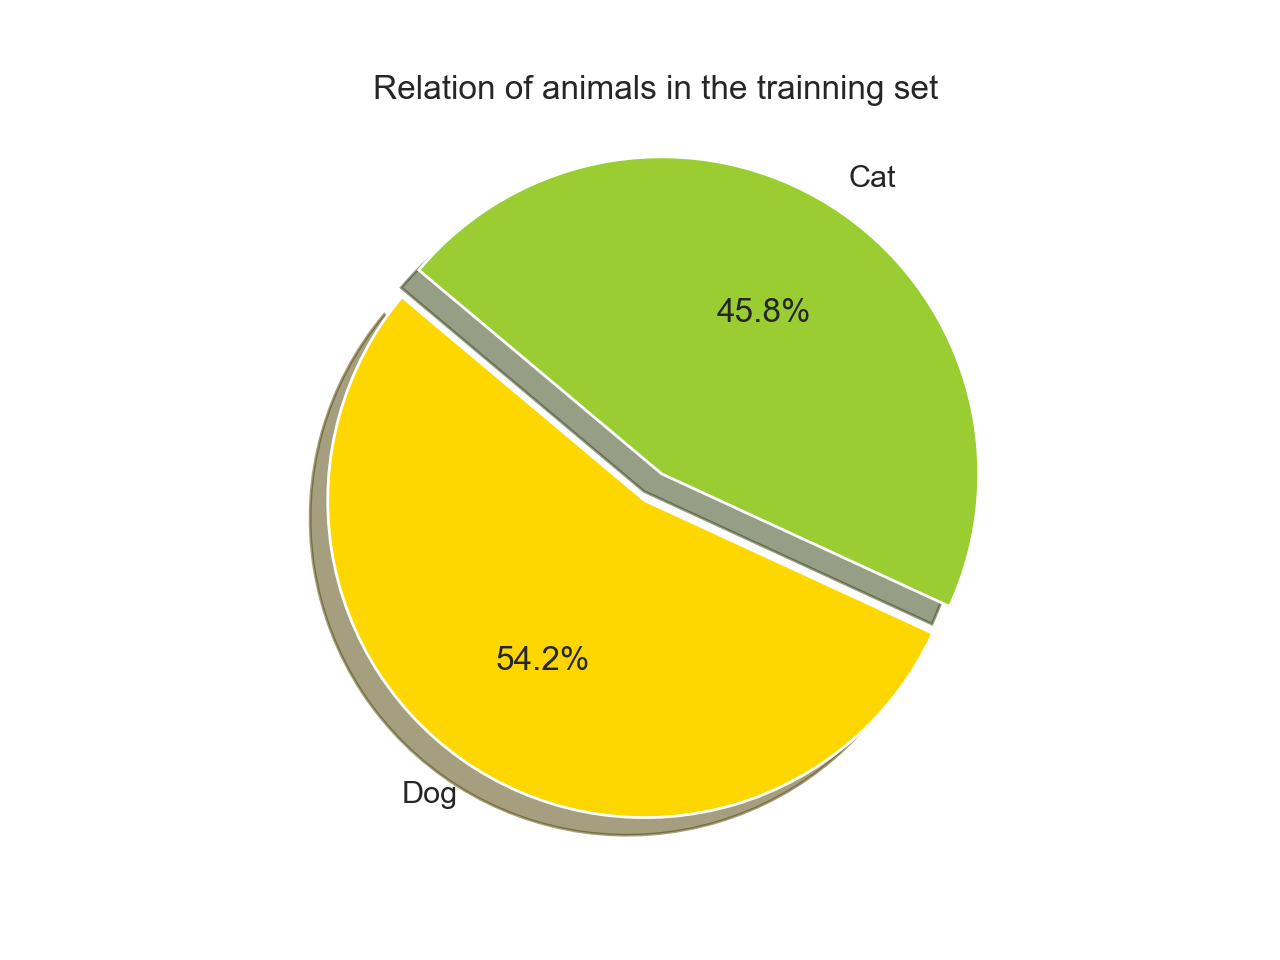

In [111]:
sizes=[sum(train.Type==1),sum(train.Type==2)]
labels=['Dog','Cat']
colors = ['gold', 'yellowgreen']
explode = (0.1, 0)  # explode 1st slice
 
# Plot
plt.figure()
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Relation of animals in the trainning set')
plt.axis('equal')
plt.show()


<IPython.core.display.Javascript object>


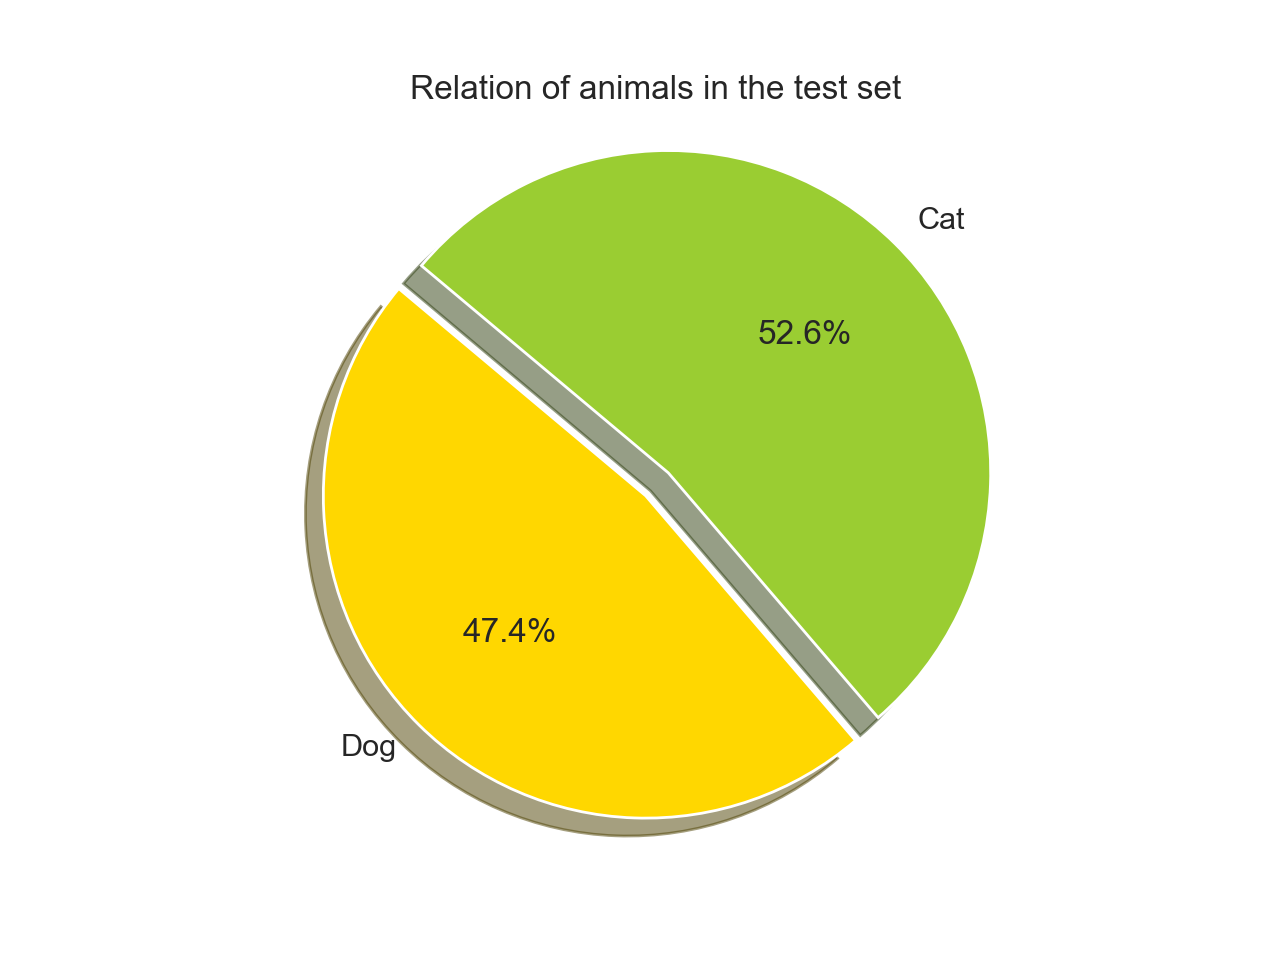

In [112]:
sizes=[sum(test.Type==1),sum(test.Type==2)]
labels=['Dog','Cat']
colors = ['gold', 'yellowgreen']
explode = (0.1, 0)  # explode 1st slice
 
# Plot
plt.figure()
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Relation of animals in the test set') 
plt.axis('equal')
plt.show()


There are almost the same number of dogs than cats in the full data set, trainning and test data set. One option here is to train two different models cats and dogs

### Gender

<IPython.core.display.Javascript object>


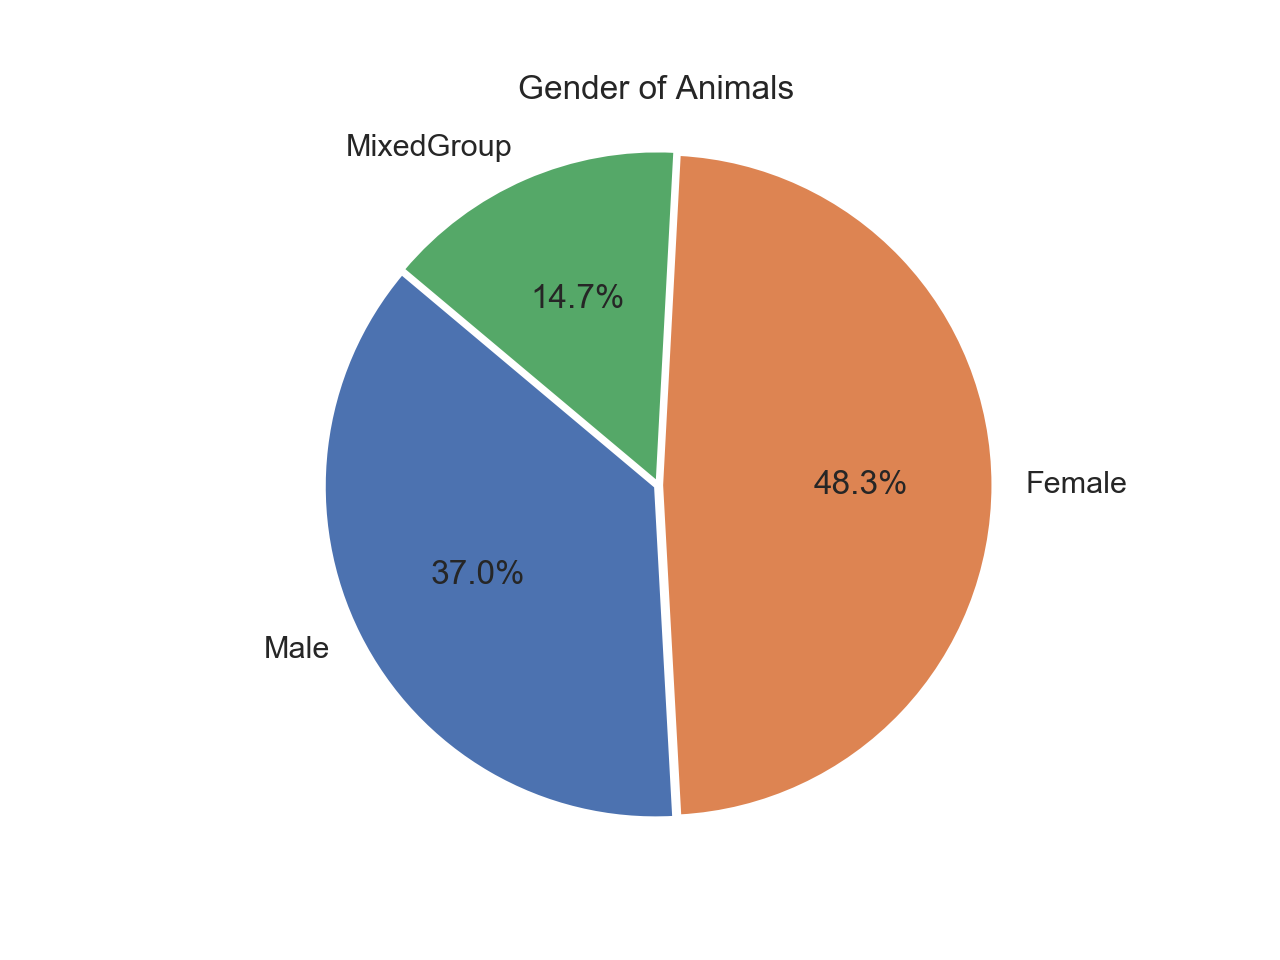

In [113]:
sizes=[sum(full.Gender==1),sum(full.Gender==2),sum(full.Gender==3)]
labels=['Male','Female','MixedGroup']
colors = ['gold', 'yellowgreen']
explode = (0.01, 0.01,0.01)  # explode 1st slice
 
# Plot
plt.figure()
plt.pie(sizes, explode=explode, labels=labels,
        autopct='%1.1f%%', shadow=False, startangle=140)
plt.title('Gender of Animals') 
plt.axis('equal')
plt.show()

There is a big group of Mixed Gender animals on the data set

### Fee

In [114]:
#Percentage of free animals
sum(full.Fee==0)/full.shape[0]

0.8374953803917428

Since the ratio of free animals is really high, we will drop free animals to see how is the charged animals relation price

<IPython.core.display.Javascript object>


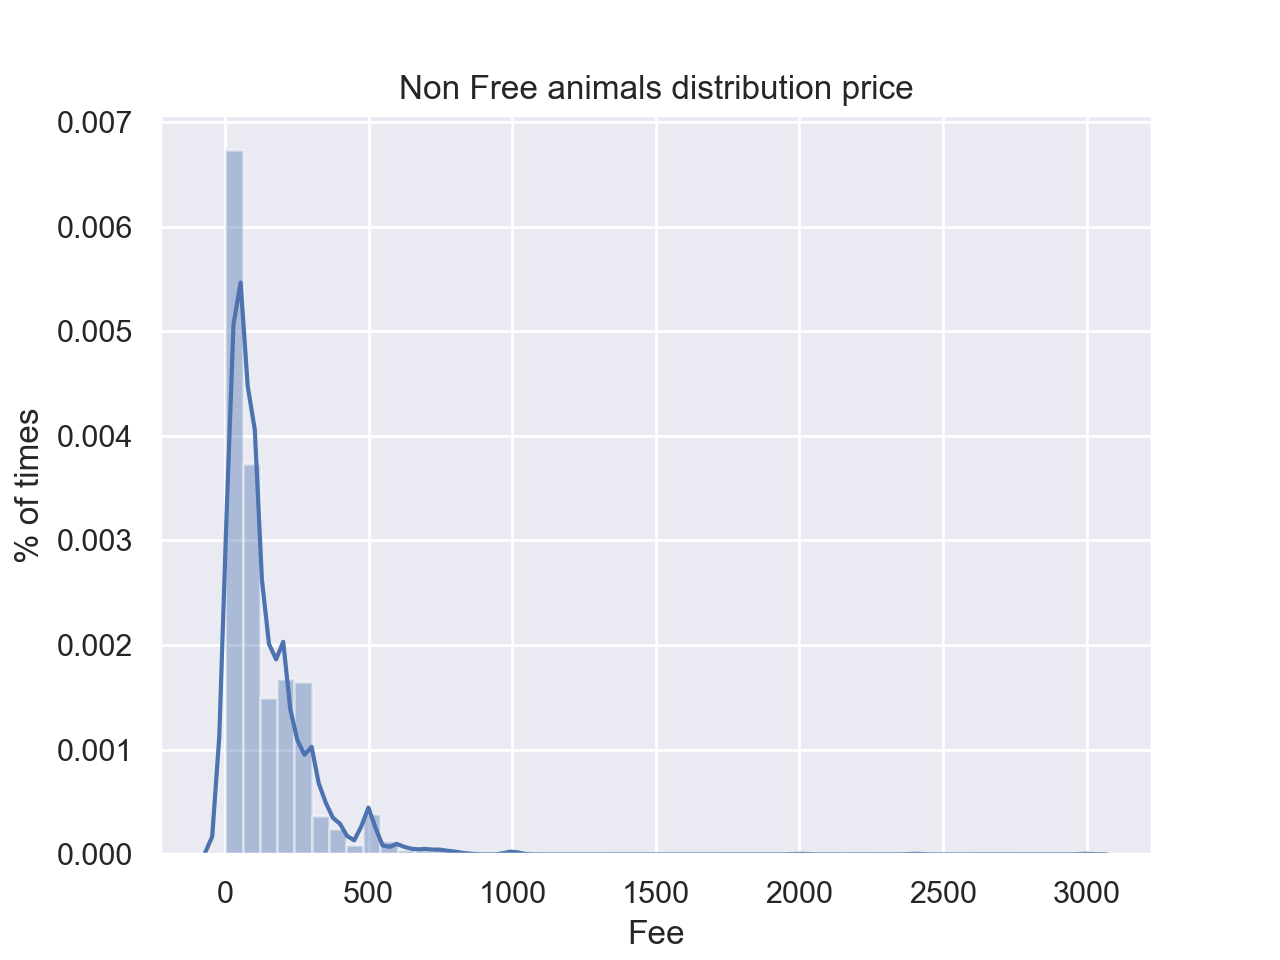

count    3078.000000
mean      138.633528
std       154.670388
min         1.000000
25%        50.000000
50%       100.000000
75%       200.000000
max      3000.000000
Name: Fee, dtype: float64


In [115]:
temporary = full[full.Fee != 0]
plt.figure()
sns.distplot(temporary.Fee)
plt.ylabel('% of times')
plt.title('Non Free animals distribution price')
plt.show()
print(temporary.Fee.describe())
del temporary

### Quantity

In [116]:
#Percentage of only animals
sum(full.Quantity==1)/full.shape[0]

0.7689139960931313

Most animals are put into adoption individually so we will drop individuals to see how the group behaves

<IPython.core.display.Javascript object>


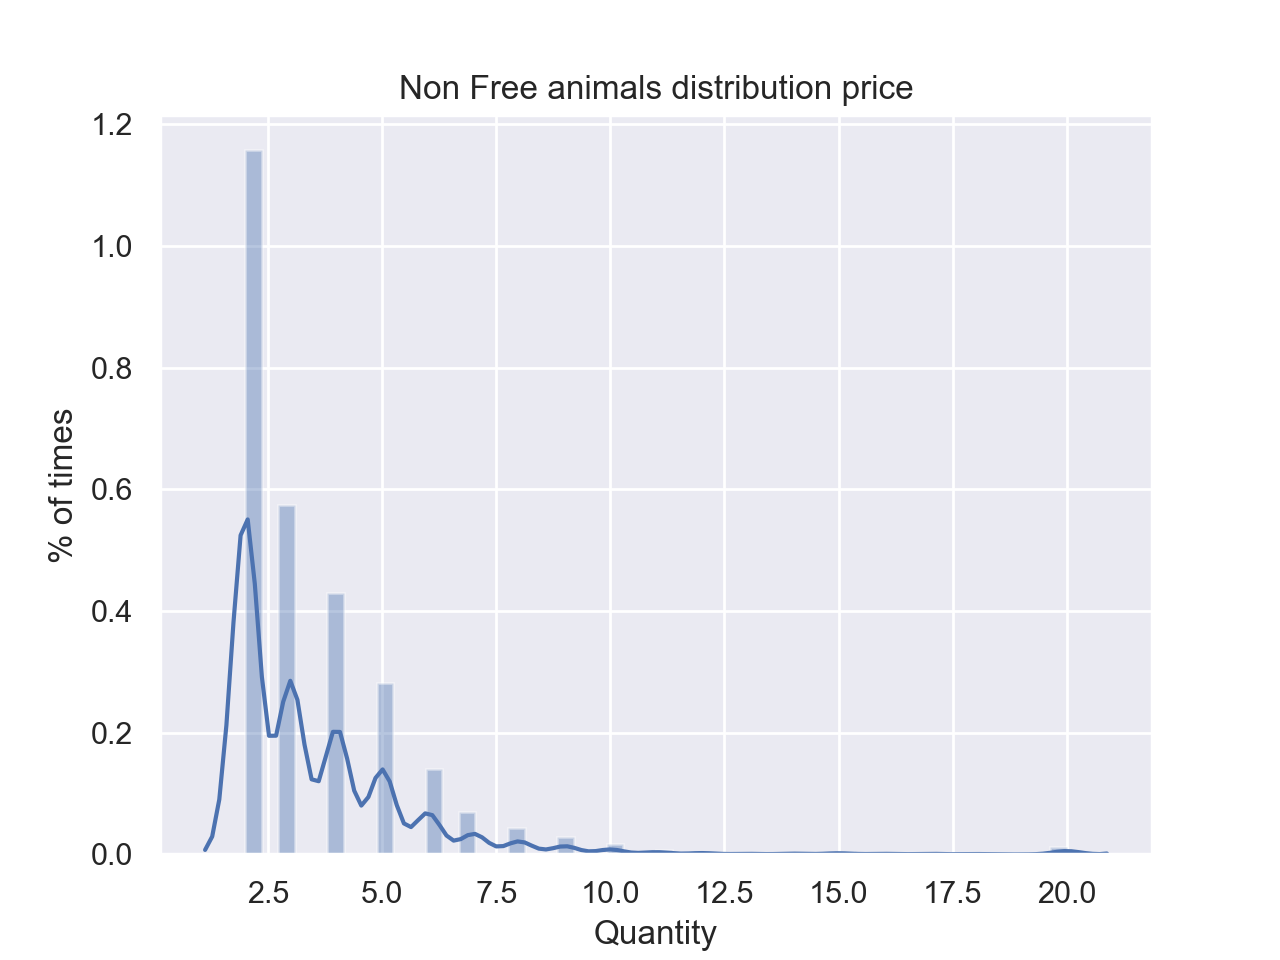

count    4377.000000
mean        3.538268
std         2.193759
min         2.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        20.000000
Name: Quantity, dtype: float64


In [117]:
temporary = full[full.Quantity != 1]
plt.figure()
sns.distplot(temporary.Quantity)
plt.ylabel('% of times')
plt.title('Non Free animals distribution price')
plt.show()
print(temporary.Quantity.describe())
del temporary

### Health

<IPython.core.display.Javascript object>


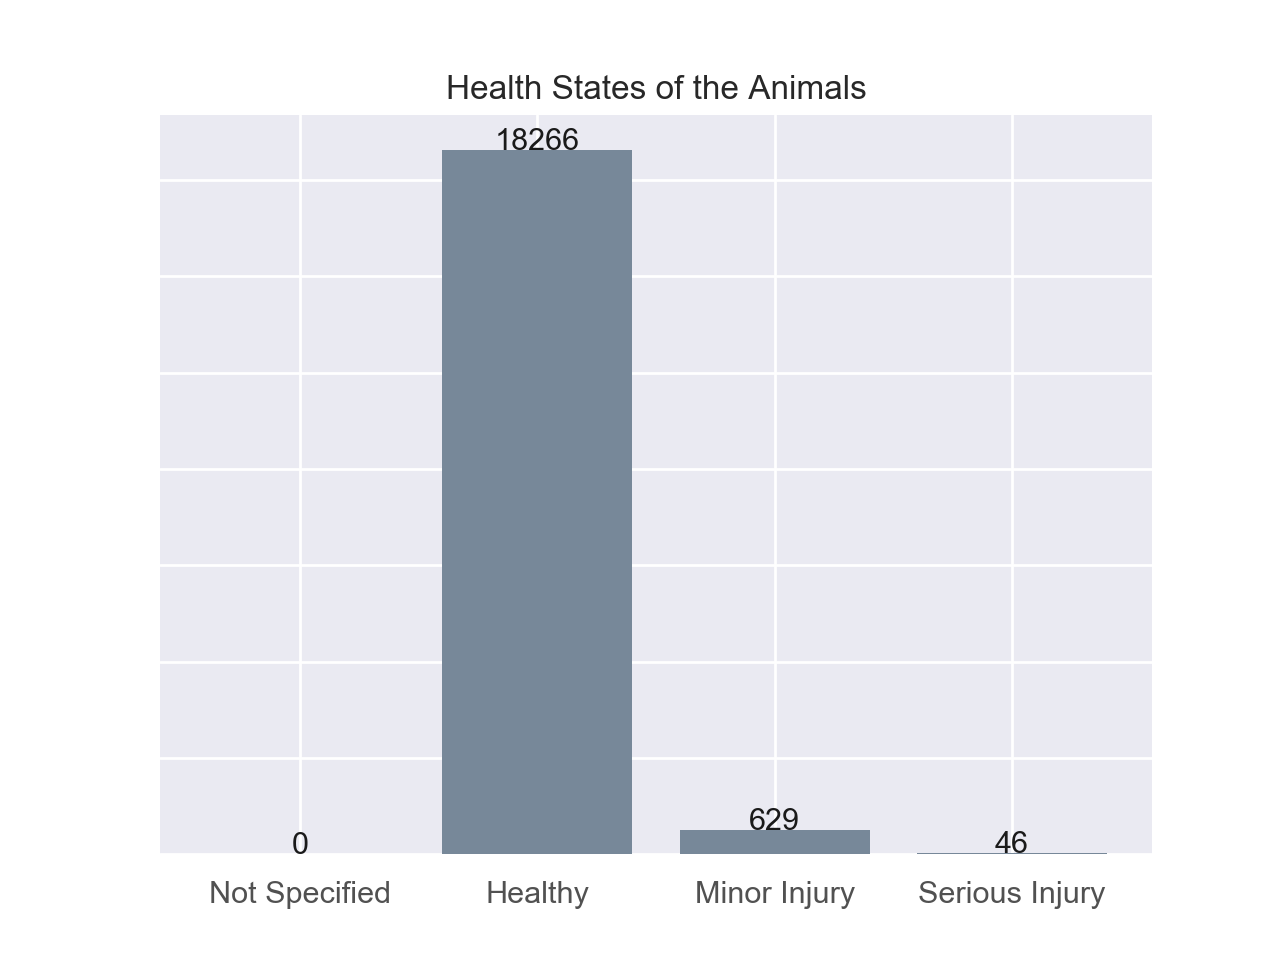

In [118]:
plt.figure()
health_states =['Not Specified','Healthy', 'Minor Injury','Serious Injury']
pos = np.arange(len(health_states))
health=[np.sum(full.Health==0),np.sum(full.Health==1),np.sum(full.Health==2),np.sum(full.Health==3)]
# change the bar color to be less bright blue
bars = plt.bar(pos, health, align='center', linewidth=0, color='lightslategrey')
# soften all labels by turning grey
plt.xticks(pos, health_states, alpha=0.8)
plt.title('Health States of the Animals', alpha=3)
# remove all the ticks (both axes), and tick labels on the Y axis
plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')
# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)
for bar in bars:
    plt.gca().text(bar.get_x() + bar.get_width()/2, bar.get_height() - 1, str(int(bar.get_height())), 
                 ha='center', color='k', fontsize=11)
plt.show()

We can appreciate that all animals in the train set have a health report, and most of them are healthy

### Age

<IPython.core.display.Javascript object>


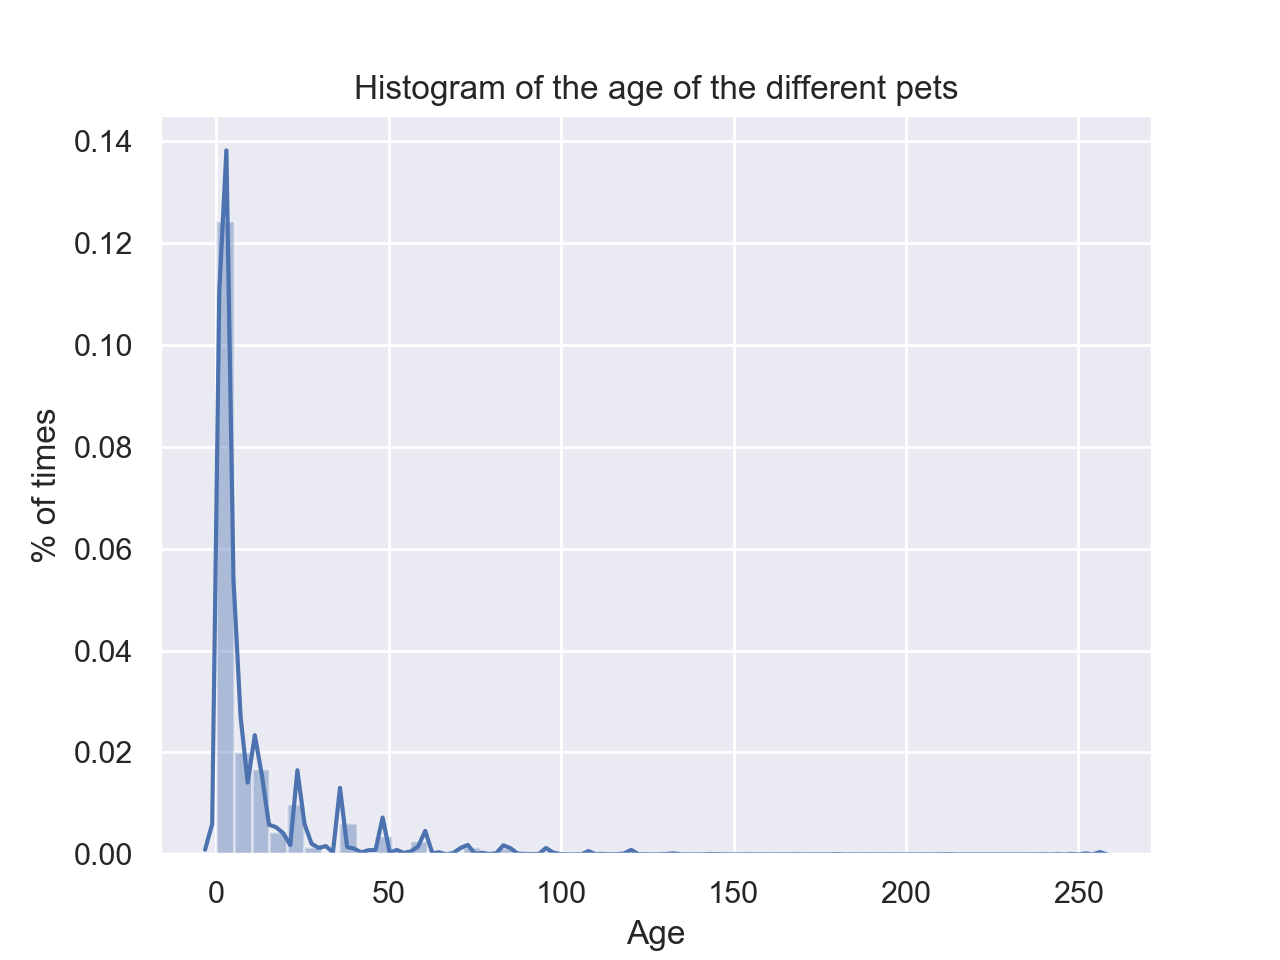

count    18941.000000
mean        10.683966
std         18.247672
min          0.000000
25%          2.000000
50%          3.000000
75%         12.000000
max        255.000000
Name: Age, dtype: float64

In [119]:
plt.figure()
sns.distplot(full.Age)
plt.ylabel('% of times')
plt.title('Histogram of the age of the different pets')
plt.show()
full.Age.describe()

We can appreciate that the pets are normally young, understanding that Age=0 is less than a month and not a Nan


### Rescuer ID

In [120]:
from collections import Counter
rescuer_counts = Counter(full.RescuerID)

<IPython.core.display.Javascript object>


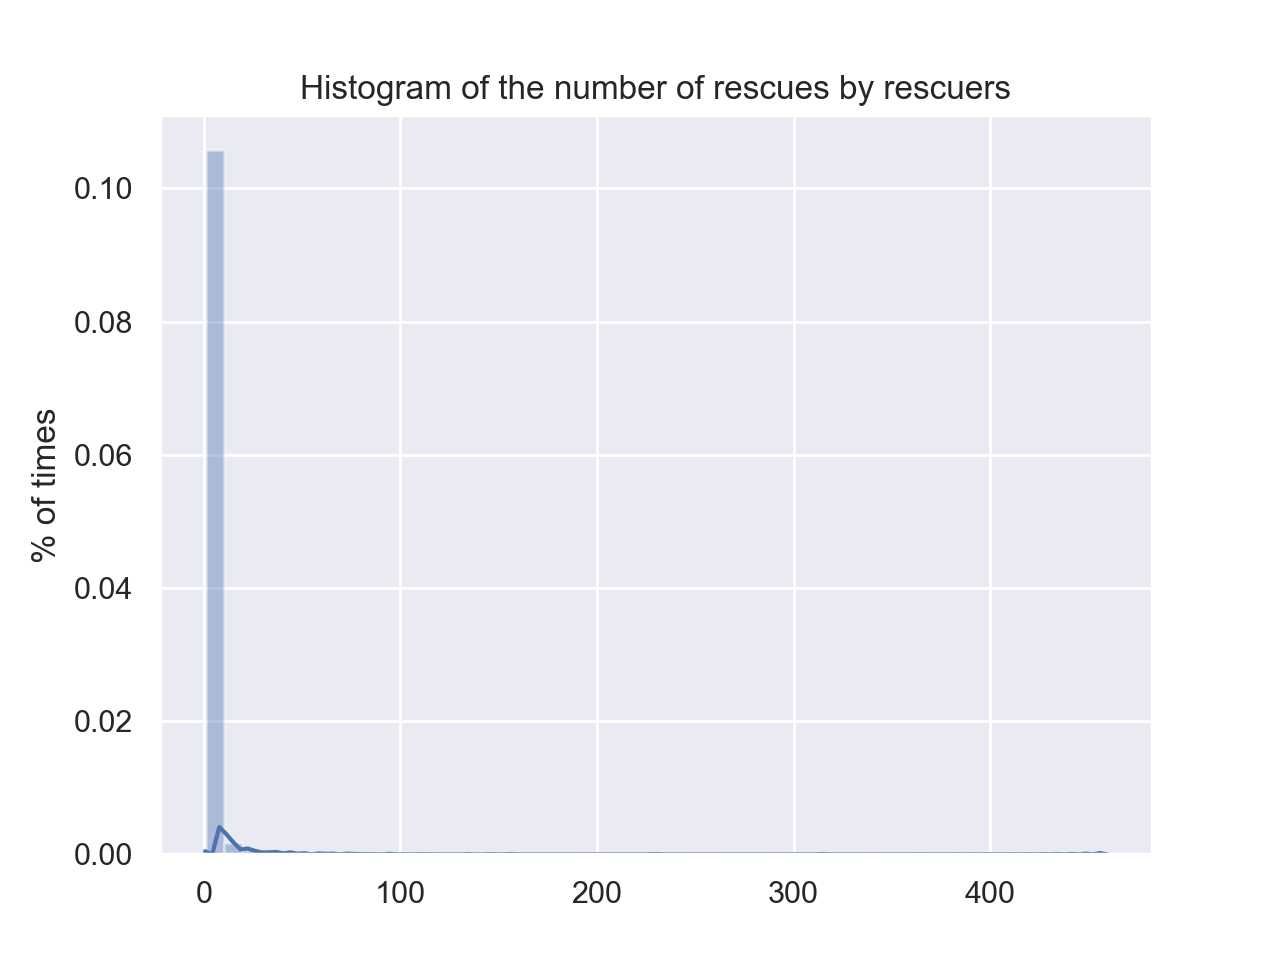

count    7113.000000
mean        2.662871
std         9.740196
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max       459.000000
dtype: float64

In [121]:
plt.figure()
sns.distplot(list(rescuer_counts.values()))
plt.ylabel('% of times')
plt.title('Histogram of the number of rescues by rescuers')
plt.show()
pd.Series(list(rescuer_counts.values())).describe()

We can appreciate that most of the the Rescuers just report a dog, we can assume that this is random people that give only a founded dog or have a litter and they are turning the dogs
There is a rescuer that gave more than 459 dogs in rescue

### Predictions

<IPython.core.display.Javascript object>


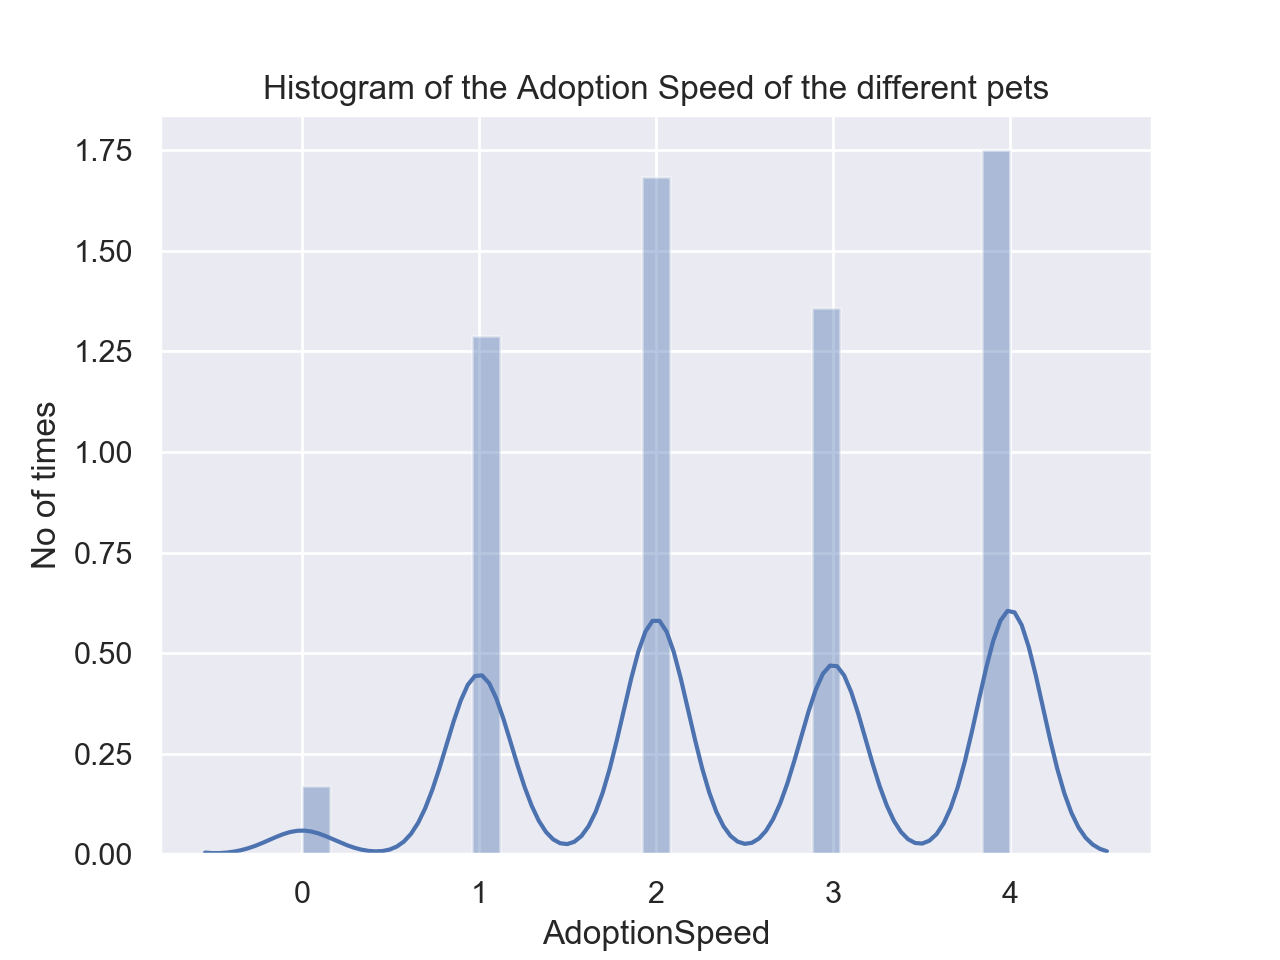

count    14993.000000
mean         2.516441
std          1.177265
min          0.000000
25%          2.000000
50%          2.000000
75%          4.000000
max          4.000000
Name: AdoptionSpeed, dtype: float64

In [122]:
plt.figure()
sns.distplot(train.AdoptionSpeed)
plt.ylabel('No of times')
plt.title('Histogram of the Adoption Speed of the different pets')
plt.show()
pd.Series(train.AdoptionSpeed.describe())


0 - Pet was adopted on the same day as it was listed. 

1 - Pet was adopted between 1 and 7 days (1st week) after being listed. 

2 - Pet was adopted between 8 and 30 days (1st month) after being listed. 

3 - Pet was adopted between 31 and 90 days (2nd & 3rd month) after being listed. 

4 - No adoption after 100 days of being listed. (There are no pets in this dataset that waited between 90 and 100 days).

We observe that the number of pets adopted in the same day is minimum while the maximum is pets that have not been adopted after +90 days

### Vaccinated

<IPython.core.display.Javascript object>


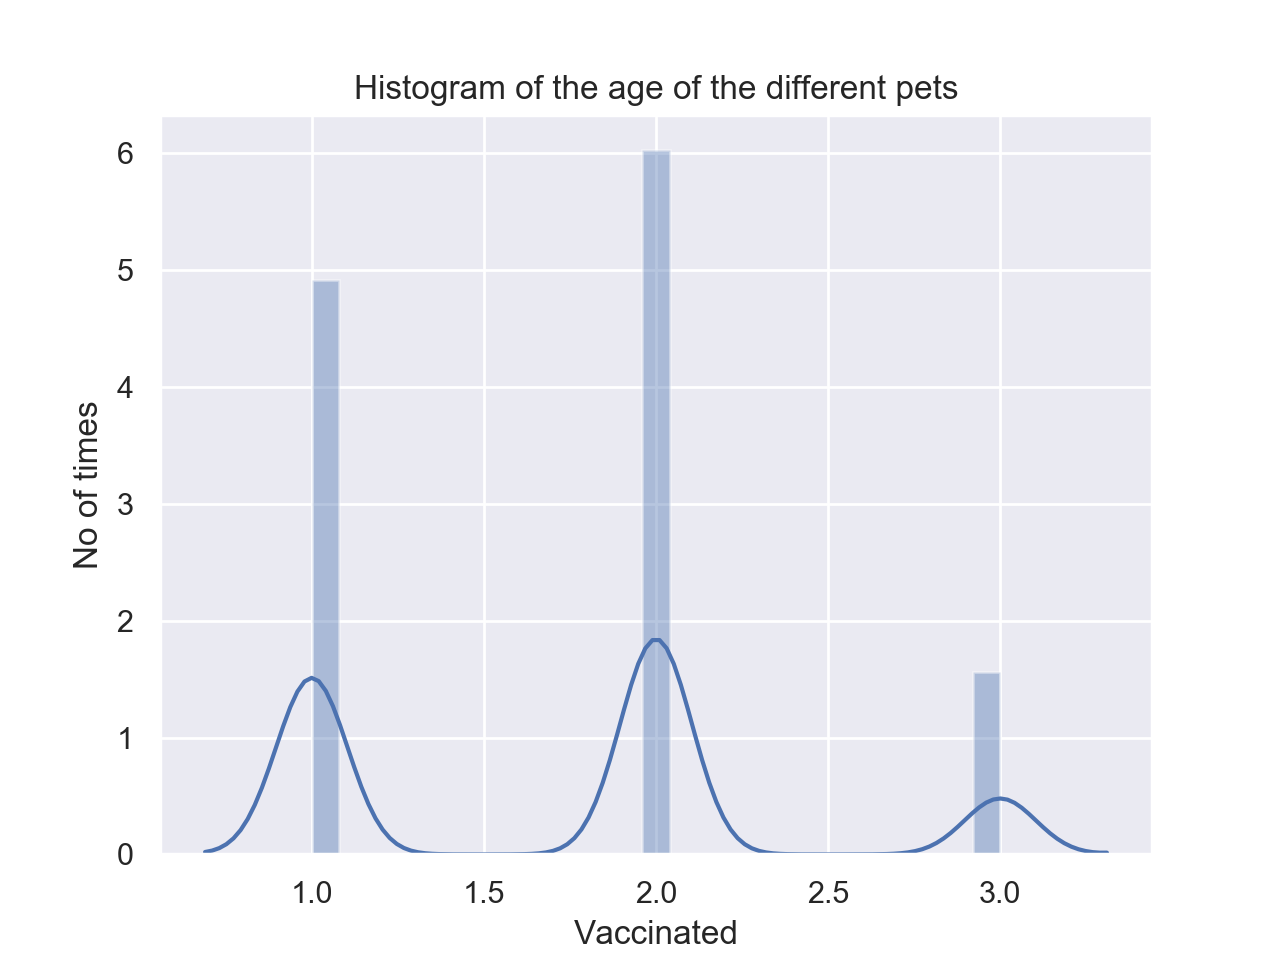

count    14993.000000
mean         1.731208
std          0.667649
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: Vaccinated, dtype: float64

In [123]:
plt.figure()
sns.distplot(train.Vaccinated)
plt.ylabel('No of times')
plt.title('Histogram of the age of the different pets')
plt.show()
pd.Series(train.Vaccinated.describe())
# Pet has been vaccinated (1 = Yes, 2 = No, 3 = Not Sure)

Surprisingly there are more  not vaccinated dogs than vaccinated. I guess that would be good to assume that people that dont know that if the dog is vaccinated put them in the no vaccinated group 

# Data Cleaning for ML

In [124]:
#Easy DataCleaning to avoid categorical features
from sklearn.preprocessing import LabelEncoder

cols=[]

for i in full:
    if type(full[i][4])==str: #I put a 4. Works any other but 0
        cols.append(i)        

for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(full[c].values)) 
    full[c] = lbl.transform(list(full[c].values))

# shape        
print('Shape all_data: {}'.format(full.shape))

Shape all_data: (18941, 25)


In [149]:
test=full.query('AdoptionSpeed =="NaN"')
train=full.query('AdoptionSpeed !="NaN"')
target=train['AdoptionSpeed']
train.drop(columns=['AdoptionSpeed','Description','Name','PetID','RescuerID','animal'],inplace=True)
test.drop(columns=['AdoptionSpeed','Name', 'RescuerID', 'Description', 'PetID','animal'],inplace=True)

# Machine Learning

In [126]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
# Seed for reproducability
seed = 12345
np.random.seed(seed)


In [127]:
# Metric used for this competition (Quadratic Weigthed Kappa aka Cohen Kappa Score)
def metric(y1,y2):
    return cohen_kappa_score(y1,y2, weights='quadratic')

### Random Forest

In [128]:
rf=RandomForestClassifier(n_estimators=1100,min_samples_split=10,min_samples_leaf=1,max_features='auto',max_depth=60,bootstrap=True)
rf.fit(train,target)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=60, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=1100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [129]:
# Measure of performance 
# Useful for checking overfitting, performance, etc.
metric(rf.predict(train), target)

0.7909667642087517

### Extratrees

In [130]:
extra_trees = ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='entropy',
           max_depth=83, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=5,
           min_weight_fraction_leaf=0.0, n_estimators=225, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)



In [131]:
extra_trees.fit(train,target)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='entropy',
           max_depth=83, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=5,
           min_weight_fraction_leaf=0.0, n_estimators=225, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [132]:
metric(extra_trees.predict(train), target)

0.5841146093688792

### CatBoost

In [133]:
from catboost import CatBoostClassifier

In [134]:
cb = CatBoostClassifier(iterations=2, learning_rate=1, depth=8, loss_function='MultiClass')
cb.fit(train,target);

0:	learn: -1.4337364	total: 112ms	remaining: 112ms
1:	learn: -1.3709229	total: 219ms	remaining: 0us


In [135]:
metric(cb.predict(train), target)

0.286589874502595

### Adaboost

In [136]:
adab=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.2, n_estimators=225, random_state=None)

In [137]:
adab.fit(train,target)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.2, n_estimators=225, random_state=None)

In [138]:
# Measure of performance 
# Useful for checking overfitting, performance, etc.
metric(adab.predict(train), target)

0.3360006957882734

### GaussianNB

In [139]:
from sklearn.naive_bayes import GaussianNB
gauss=GaussianNB()
gauss.fit(train,target)
metric(gauss.predict(train), target)

0.2327404246795629

### Performance of the models

In [140]:
print('Random Forest score: ', metric(rf.predict(train), 
                                target))
print('Extra Trees score:   ', metric(extra_trees.predict(train), 
                                target))
print('Adaboost score:      ', metric(adab.predict(train), 
                                target))
print('Catboos score:       ', metric(cb.predict(train), 
                                target))
print('GaussianNB score:    ', metric(gauss.predict(train), 
                                target))

Random Forest score:  0.7909667642087517
Extra Trees score:    0.5841146093688792
Adaboost score:       0.3360006957882734
Catboos score:        0.286589874502595
GaussianNB score:     0.2327404246795629


# Ensambling

In [151]:
# Get predictions
predictions1 = rf.predict(test)
predictions2 = extra_trees.predict(test)
predictions3 = adab.predict(test)
predictions4 = gauss.predict(test)
predictions5 = cb.predict_proba(test)[:, 1]

# Combine predictions
final_predictions = []
# Get average of predictions
for pred in zip(predictions1, predictions2, predictions3, predictions4,predictions5):
    final_predictions.append(int(round((sum(pred)) / 5, 0)))

In [153]:
# Compare predictions
prediction_df = pd.DataFrame({'Random Forest' : predictions1,
                              'Extra Trees'   : predictions2,
                              'Adaboost'      : predictions3,
                              'GaussianNB'    : predictions4,
                              'Catboost'      : predictions5,
})

prediction_df.head()

,Random Forest,Extra Trees,Adaboost,GaussianNB,Catboost
0,2.0,2.0,2.0,1.0,0.235100
1,4.0,4.0,4.0,4.0,0.149276
2,4.0,4.0,4.0,2.0,0.149276
3,4.0,4.0,4.0,4.0,0.129272
4,4.0,4.0,4.0,4.0,0.066506


### Submission

In [154]:
# Get and store predictions

test=pd.read_csv(KAGGLE_DIR+'test/test.csv')
submission_df = pd.DataFrame(data={"PetID" : test["PetID"], 
                                   "AdoptionSpeed" : final_predictions})


In [155]:
submission_df['AdoptionSpeed']=submission_df['AdoptionSpeed'].astype('int32');
submission_df.to_csv("sample_submission.csv", index=False)

In [156]:
submission_df.head()

,PetID,AdoptionSpeed
0,378fcc4fc,1
1,73c10e136,3
2,72000c4c5,3
3,e147a4b9f,3
4,43fbba852,3
